In [1]:
import eli5
import xgboost
from model import get_model
import matplotlib.pyplot as plt

In [2]:
%%capture
cate_model, _, feature_columns = get_model()

In [3]:
eli5.show_weights(cate_model, feature_names=feature_columns)

Weight,Feature
0.1144,school_mindset
0.1046,school_ethnic_minority
0.1028,school_size
0.1002,school_achievement
0.0949,school_poverty
0.0897,schoolid
0.0872,school_urbanicity
0.0826,ethnicity
0.0802,frst_in_family
0.0720,gender


In [4]:
eli5.explain_weights(cate_model, feature_names=feature_columns)

Weight,Feature
0.1144,school_mindset
0.1046,school_ethnic_minority
0.1028,school_size
0.1002,school_achievement
0.0949,school_poverty
0.0897,schoolid
0.0872,school_urbanicity
0.0826,ethnicity
0.0802,frst_in_family
0.0720,gender


In [5]:
sorted(zip(cate_model.feature_importances_, feature_columns), key=lambda t: t[0], reverse=True)

[(0.114403695, 'school_mindset'),
 (0.10457882, 'school_ethnic_minority'),
 (0.10283075, 'school_size'),
 (0.100245476, 'school_achievement'),
 (0.09485069, 'school_poverty'),
 (0.089687705, 'schoolid'),
 (0.08723453, 'school_urbanicity'),
 (0.08257353, 'ethnicity'),
 (0.08021836, 'frst_in_family'),
 (0.0720255, 'gender'),
 (0.07135086, 'success_expect')]

Text(0.5, 1.0, 'Feature importance: Cover')

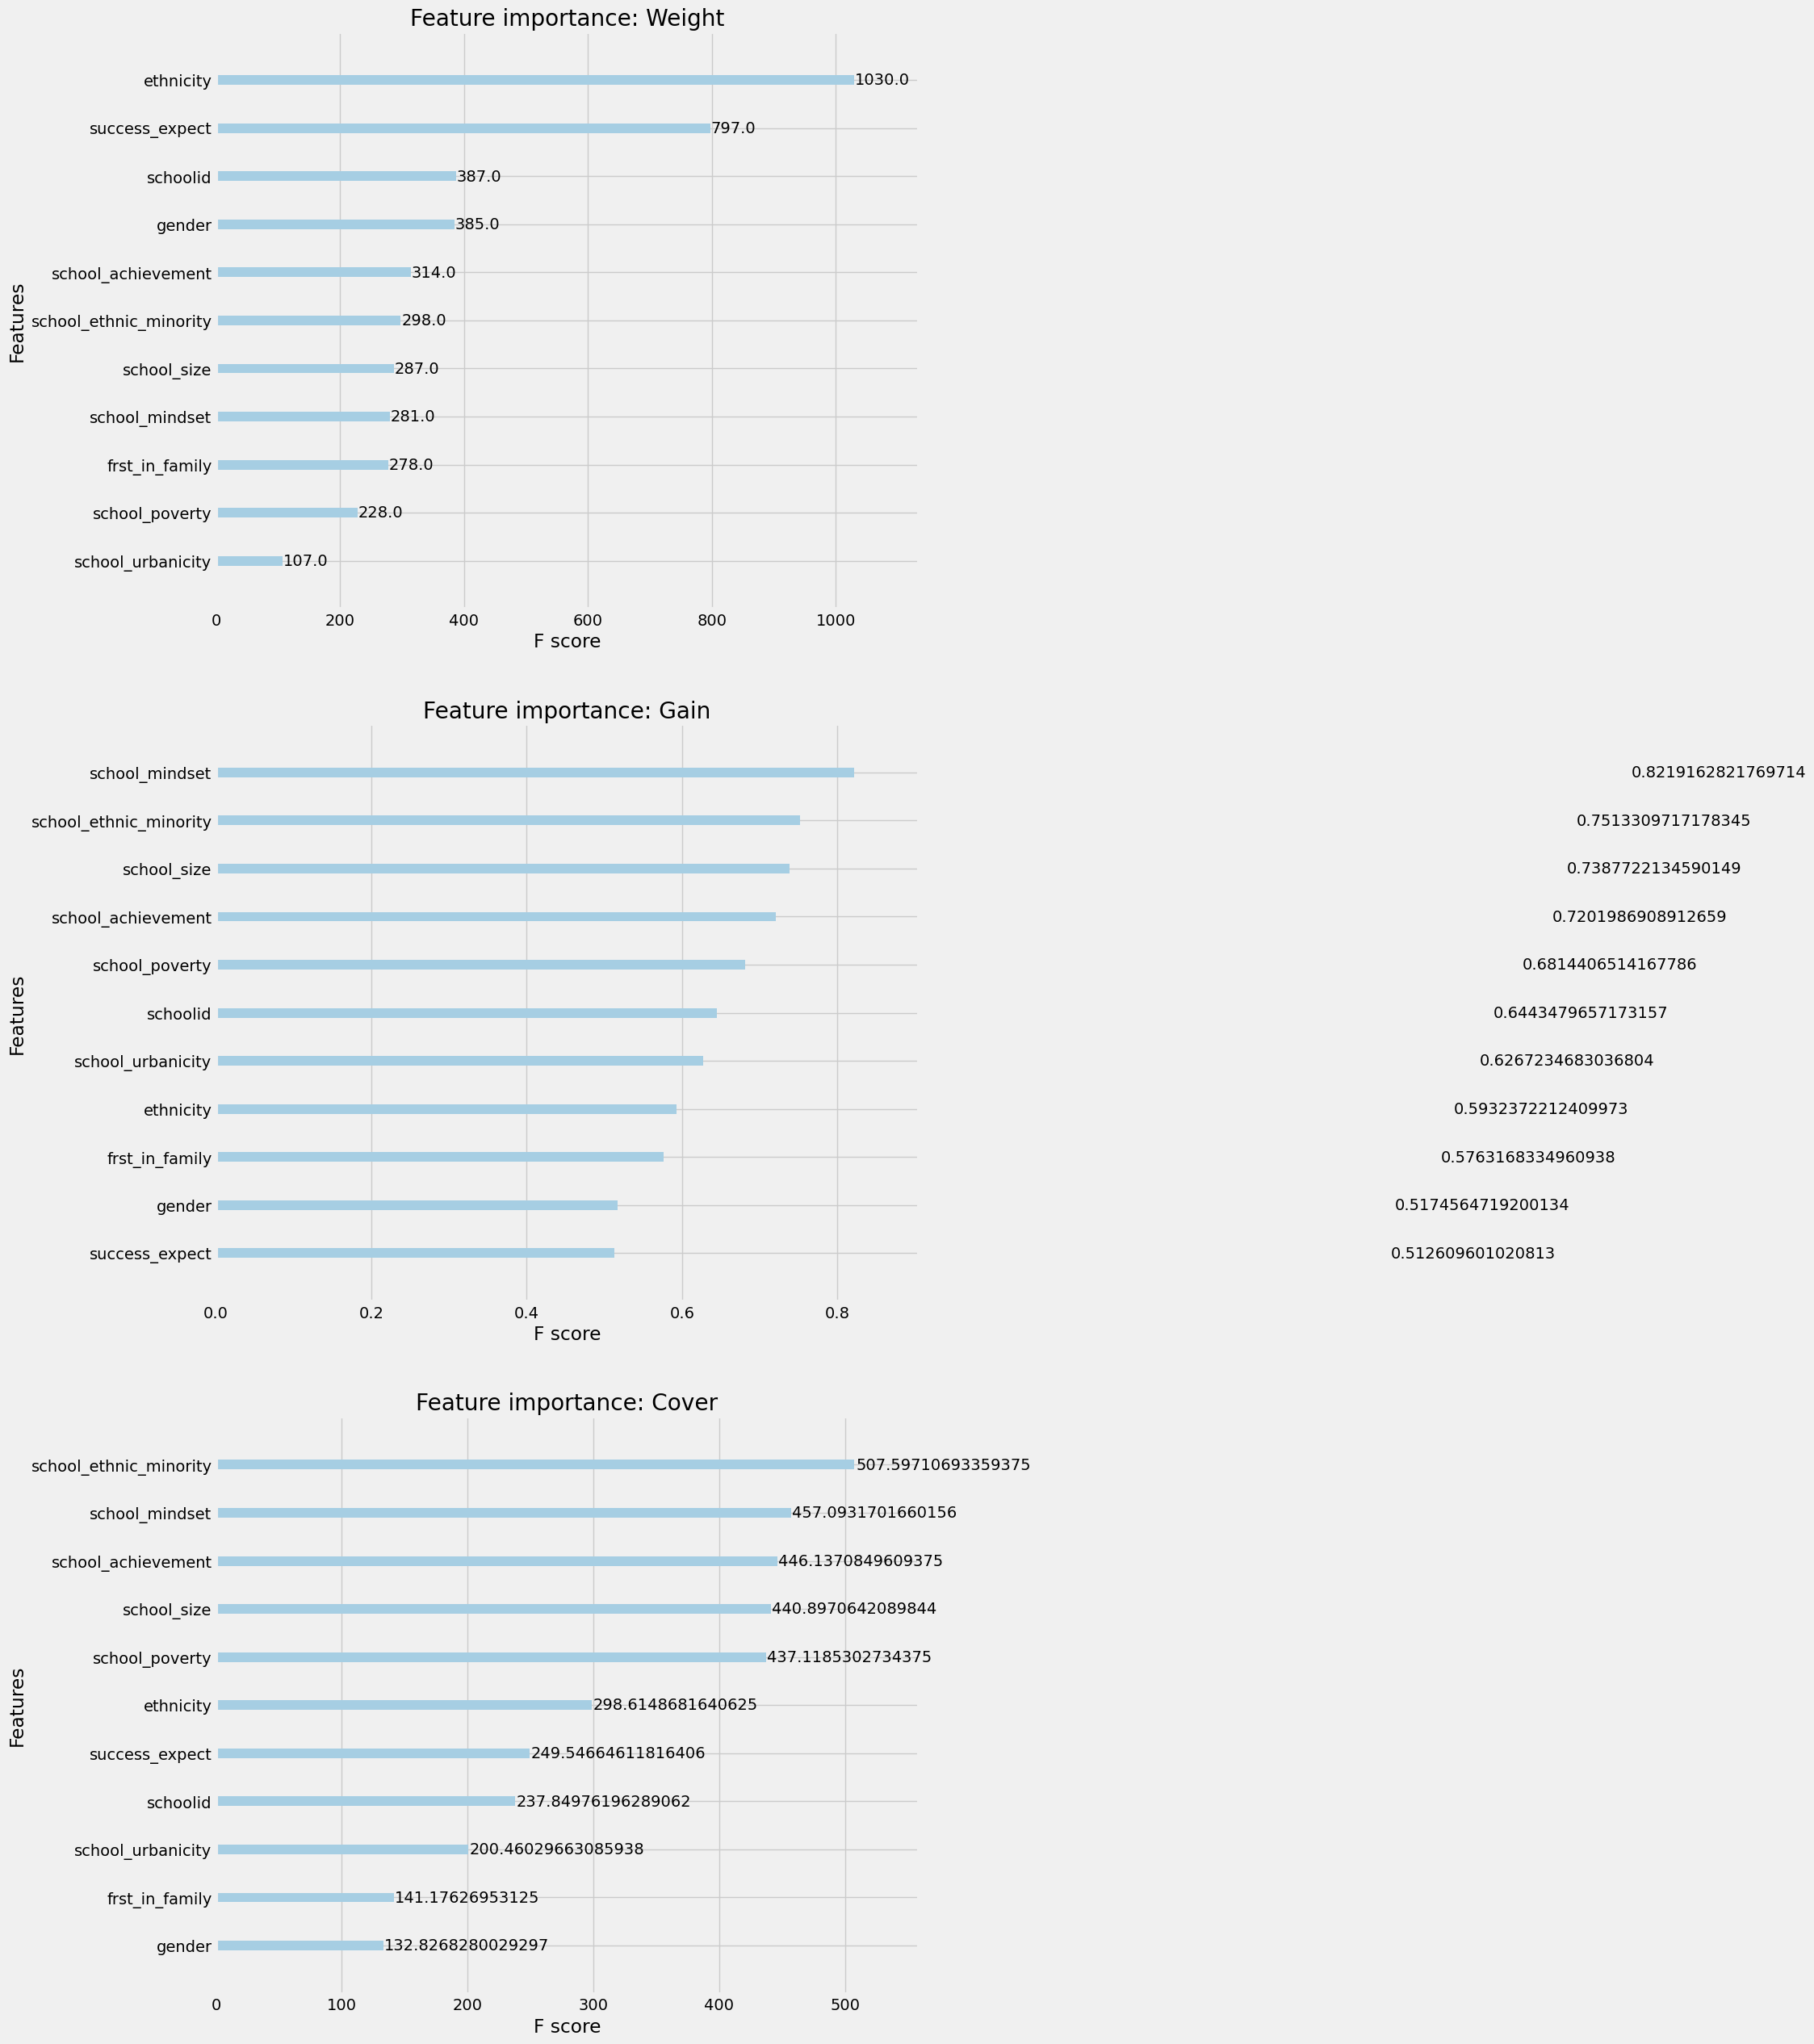

In [6]:
cate_model.get_booster().feature_names = feature_columns
fig, axes = plt.subplots(3, figsize=(10,30))
xgboost.plot_importance(cate_model.get_booster(), importance_type="weight", ax=axes[0])
xgboost.plot_importance(cate_model.get_booster(), importance_type="gain", ax=axes[1])
xgboost.plot_importance(cate_model.get_booster(), importance_type="cover", ax=axes[2])
axes[0].set_title("Feature importance: Weight")
axes[1].set_title("Feature importance: Gain")
axes[2].set_title("Feature importance: Cover")